## Импорт данных:



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Подготовка данных:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

## Обучение модели:

In [ ]:
logreg = LogisticRegression(max_iter=200, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Логистическая регрессия:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")
print(classification_report(y_test, y_pred_logreg, target_names=target_names))

Логистическая регрессия:
Accuracy: 0.97
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Визуализация данных:

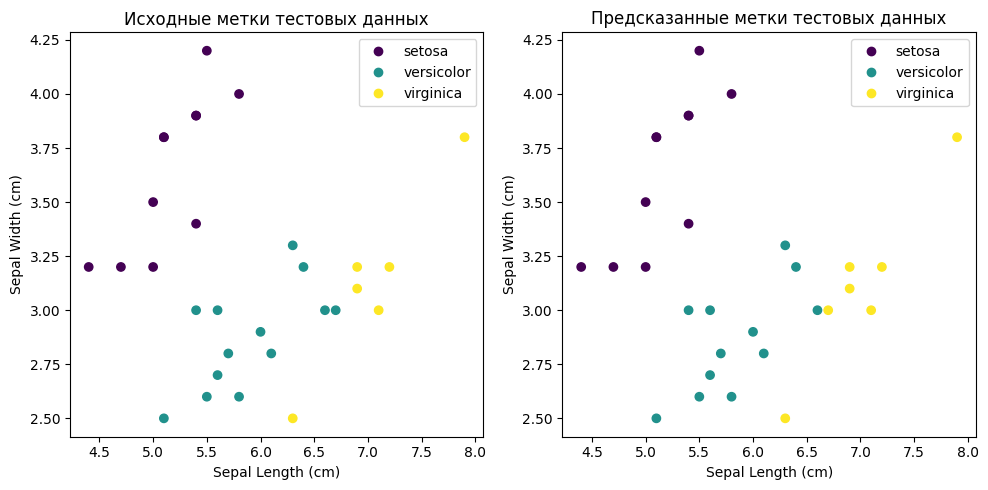

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
scatter_true = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Исходные метки тестовых данных')
plt.legend(handles=scatter_true.legend_elements()[0], labels=iris.target_names.tolist())

plt.subplot(1, 2, 2)
scatter_pred = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_logreg)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Предсказанные метки тестовых данных')
plt.legend(handles=scatter_pred.legend_elements()[0], labels=iris.target_names.tolist())

plt.tight_layout()
plt.show()

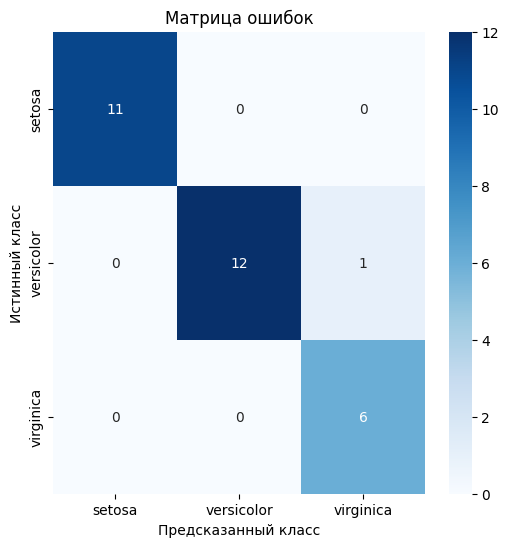

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title("Матрица ошибок")
    plt.xlabel("Предсказанный класс")
    plt.ylabel("Истинный класс")
    plt.show()

plot_confusion_matrix(y_test, y_pred_logreg, target_names)